<a href="https://colab.research.google.com/github/Purushotham1912/Fitbit/blob/main/WeightLog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.import libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as mn

# 2.import dataset

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/prepinsta internship/week 8/weightLogInfo_merged.csv")

In [ ]:
df

,Id,Date,WeightKg,WeightPounds,Fat,BMI,IsManualReport,LogId
0,1503960366,5/2/2016 11:59:59 PM,52.599998,115.963147,22.0,22.650000,True,1462233599000
1,1503960366,5/3/2016 11:59:59 PM,52.599998,115.963147,NaN,22.650000,True,1462319999000
2,1927972279,4/13/2016 1:08:52 AM,133.500000,294.317120,NaN,47.540001,False,1460509732000
3,2873212765,4/21/2016 11:59:59 PM,56.700001,125.002104,NaN,21.450001,True,1461283199000
4,2873212765,5/12/2016 11:59:59 PM,57.299999,126.324875,NaN,21.690001,True,1463097599000
...,...,...,...,...,...,...,...,...
62,8877689391,5/6/2016 6:43:35 AM,85.000000,187.392923,NaN,25.440001,False,1462517015000
63,8877689391,5/8/2016 7:35:53 AM,85.400002,188.274775,NaN,25.559999,False,1462692953000
64,8877689391,5/9/2016 6:39:44 AM,85.500000,188.495234,NaN,25.610001,False,1462775984000
65,8877689391,5/11/2016 6:51:47 AM,85.400002,188.274775,NaN,25.559999,False,1462949507000


In [ ]:
df.head()

,Id,Date,WeightKg,WeightPounds,Fat,BMI,IsManualReport,LogId
0,1503960366,5/2/2016 11:59:59 PM,52.599998,115.963147,22.0,22.650000,True,1462233599000
1,1503960366,5/3/2016 11:59:59 PM,52.599998,115.963147,NaN,22.650000,True,1462319999000
2,1927972279,4/13/2016 1:08:52 AM,133.500000,294.317120,NaN,47.540001,False,1460509732000
3,2873212765,4/21/2016 11:59:59 PM,56.700001,125.002104,NaN,21.450001,True,1461283199000
4,2873212765,5/12/2016 11:59:59 PM,57.299999,126.324875,NaN,21.690001,True,1463097599000


In [ ]:
df.tail()

,Id,Date,WeightKg,WeightPounds,Fat,BMI,IsManualReport,LogId
62,8877689391,5/6/2016 6:43:35 AM,85.000000,187.392923,NaN,25.440001,False,1462517015000
63,8877689391,5/8/2016 7:35:53 AM,85.400002,188.274775,NaN,25.559999,False,1462692953000
64,8877689391,5/9/2016 6:39:44 AM,85.500000,188.495234,NaN,25.610001,False,1462775984000
65,8877689391,5/11/2016 6:51:47 AM,85.400002,188.274775,NaN,25.559999,False,1462949507000
66,8877689391,5/12/2016 6:42:53 AM,84.000000,185.188300,NaN,25.139999,False,1463035373000


In [ ]:
df.shape

(67, 8)

In [ ]:
df.columns

Index(['Id', 'Date', 'WeightKg', 'WeightPounds', 'Fat', 'BMI',
       'IsManualReport', 'LogId'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Id              67 non-null     int64  
 1   Date            67 non-null     object 
 2   WeightKg        67 non-null     float64
 3   WeightPounds    67 non-null     float64
 4   Fat             2 non-null      float64
 5   BMI             67 non-null     float64
 6   IsManualReport  67 non-null     bool   
 7   LogId           67 non-null     int64  
dtypes: bool(1), float64(4), int64(2), object(1)
memory usage: 3.9+ KB


In [ ]:
df.describe()

,Id,WeightKg,WeightPounds,Fat,BMI,LogId
count,6.700000e+01,67.000000,67.000000,2.00000,67.000000,6.700000e+01
mean,7.009282e+09,72.035821,158.811801,23.50000,25.185224,1.461772e+12
std,1.950322e+09,13.923206,30.695415,2.12132,3.066963,7.829948e+08
min,1.503960e+09,52.599998,115.963147,22.00000,21.450001,1.460444e+12
25%,6.962181e+09,61.400002,135.363832,22.75000,23.959999,1.461079e+12
50%,6.962181e+09,62.500000,137.788914,23.50000,24.389999,1.461802e+12
75%,8.877689e+09,85.049999,187.503152,24.25000,25.559999,1.462375e+12
max,8.877689e+09,133.500000,294.317120,25.00000,47.540001,1.463098e+12


# 3.data cleaning

<Axes: >

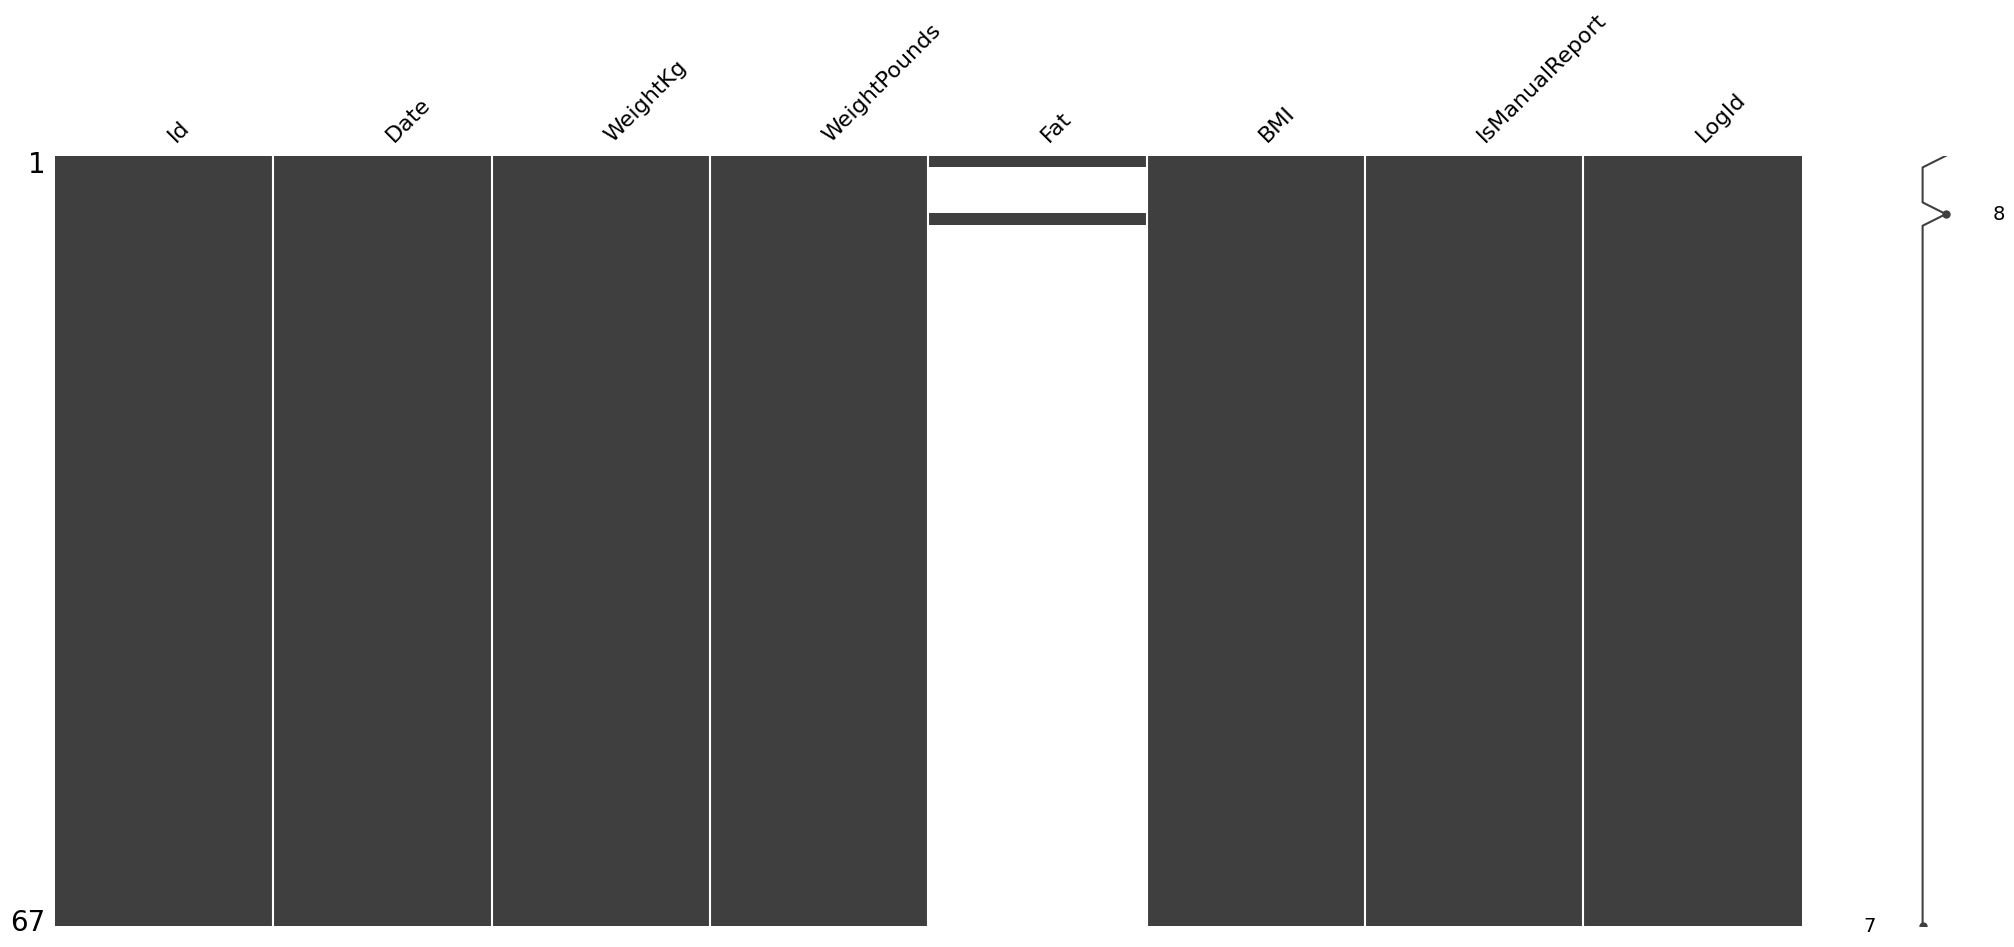

In [ ]:
mn.matrix(df)

In [ ]:
df.drop(['Fat'],axis=1,inplace=True)

In [ ]:
df

,Id,Date,WeightKg,WeightPounds,BMI,IsManualReport,LogId
0,1503960366,5/2/2016 11:59:59 PM,52.599998,115.963147,22.650000,True,1462233599000
1,1503960366,5/3/2016 11:59:59 PM,52.599998,115.963147,22.650000,True,1462319999000
2,1927972279,4/13/2016 1:08:52 AM,133.500000,294.317120,47.540001,False,1460509732000
3,2873212765,4/21/2016 11:59:59 PM,56.700001,125.002104,21.450001,True,1461283199000
4,2873212765,5/12/2016 11:59:59 PM,57.299999,126.324875,21.690001,True,1463097599000
...,...,...,...,...,...,...,...
62,8877689391,5/6/2016 6:43:35 AM,85.000000,187.392923,25.440001,False,1462517015000
63,8877689391,5/8/2016 7:35:53 AM,85.400002,188.274775,25.559999,False,1462692953000
64,8877689391,5/9/2016 6:39:44 AM,85.500000,188.495234,25.610001,False,1462775984000
65,8877689391,5/11/2016 6:51:47 AM,85.400002,188.274775,25.559999,False,1462949507000


<Axes: >

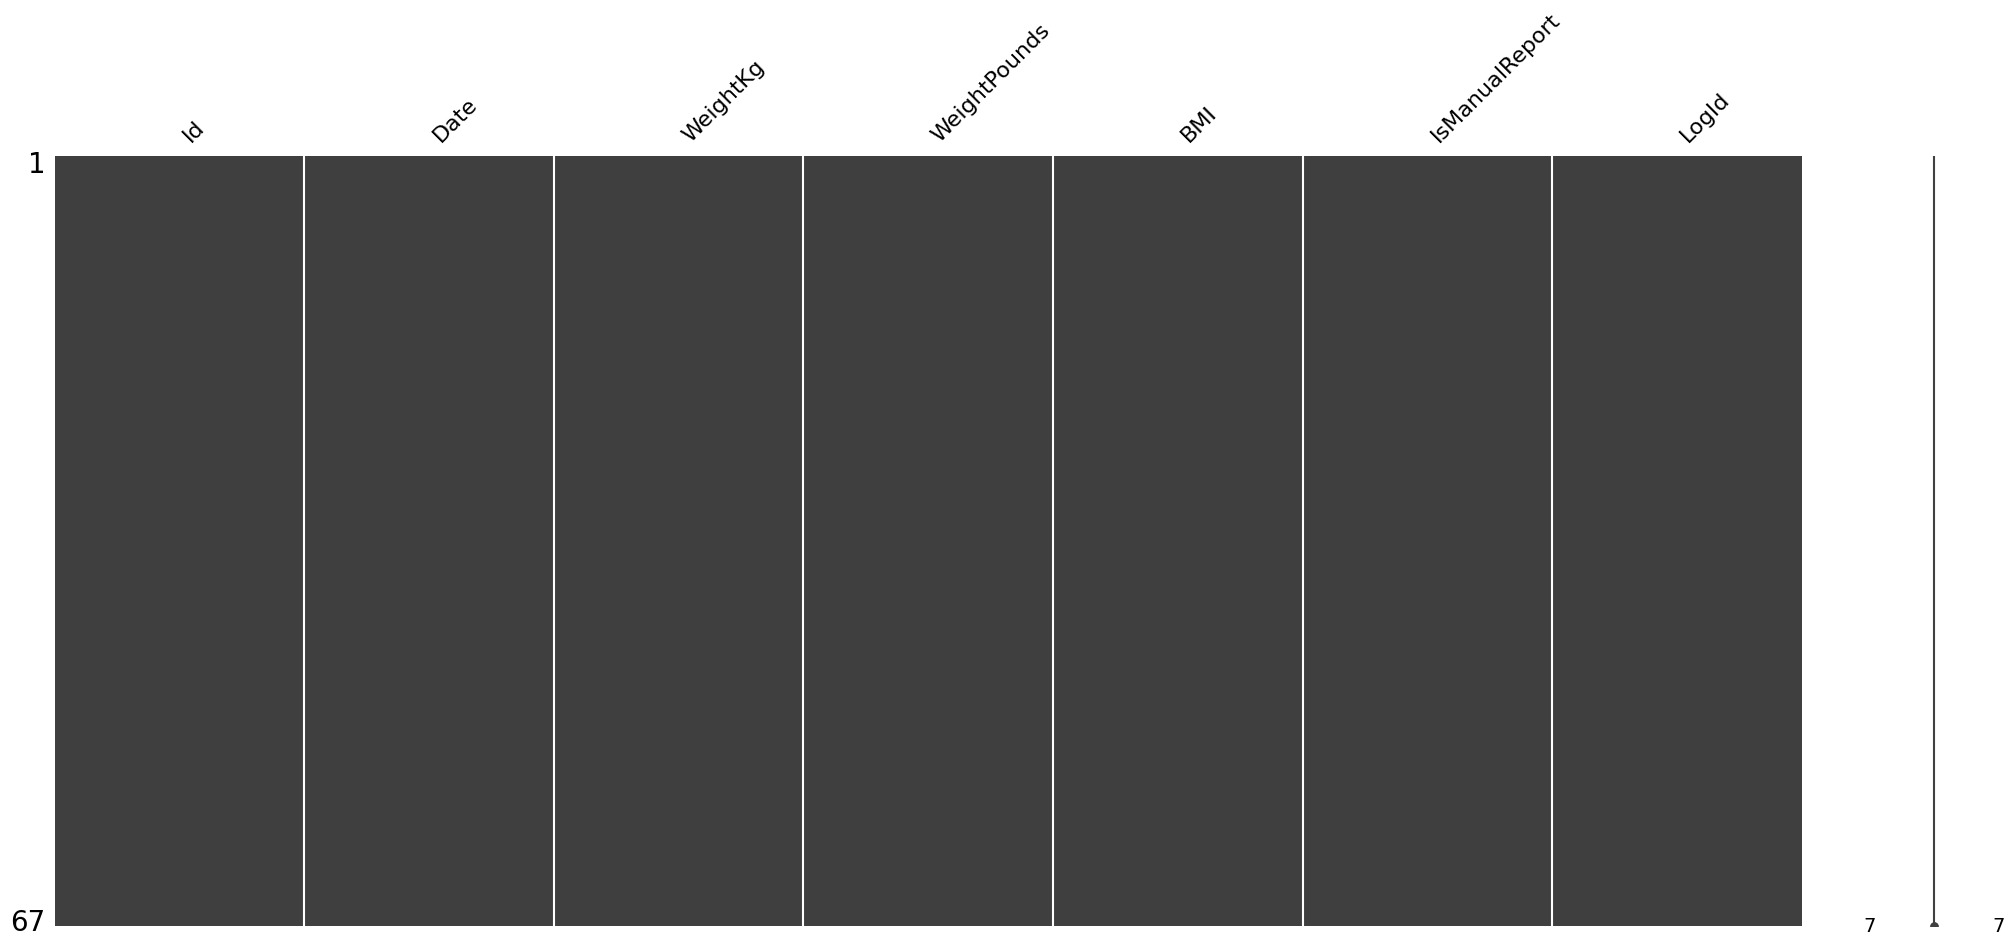

In [ ]:
mn.matrix(df)

# 4. Data Visualisation[EDA]

In [ ]:
df

,Id,Date,WeightKg,WeightPounds,BMI,IsManualReport,LogId
0,1503960366,5/2/2016 11:59:59 PM,52.599998,115.963147,22.650000,True,1462233599000
1,1503960366,5/3/2016 11:59:59 PM,52.599998,115.963147,22.650000,True,1462319999000
2,1927972279,4/13/2016 1:08:52 AM,133.500000,294.317120,47.540001,False,1460509732000
3,2873212765,4/21/2016 11:59:59 PM,56.700001,125.002104,21.450001,True,1461283199000
4,2873212765,5/12/2016 11:59:59 PM,57.299999,126.324875,21.690001,True,1463097599000
...,...,...,...,...,...,...,...
62,8877689391,5/6/2016 6:43:35 AM,85.000000,187.392923,25.440001,False,1462517015000
63,8877689391,5/8/2016 7:35:53 AM,85.400002,188.274775,25.559999,False,1462692953000
64,8877689391,5/9/2016 6:39:44 AM,85.500000,188.495234,25.610001,False,1462775984000
65,8877689391,5/11/2016 6:51:47 AM,85.400002,188.274775,25.559999,False,1462949507000


In [ ]:
df.columns

Index(['Id', 'Date', 'WeightKg', 'WeightPounds', 'BMI', 'IsManualReport',
       'LogId'],
      dtype='object')

<Axes: ylabel='Frequency'>

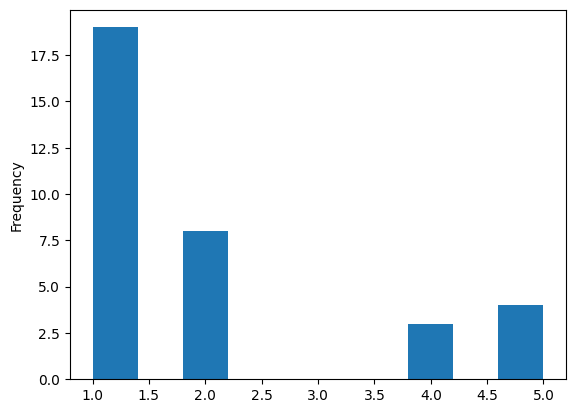

In [ ]:
df['WeightKg'].value_counts() \
.head(67) \
.plot(kind='hist')

<Axes: ylabel='Frequency'>

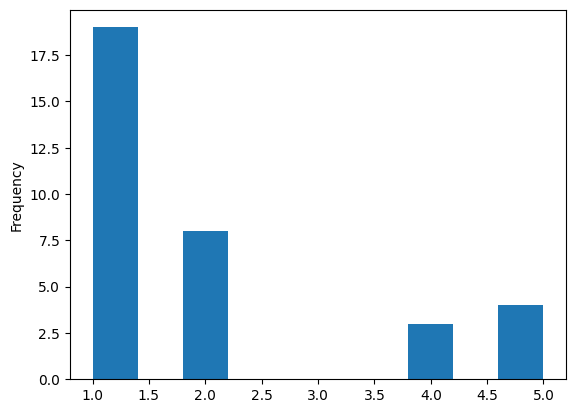

In [ ]:
df['WeightPounds'].value_counts() \
.head(67) \
.plot(kind='hist')

<Axes: ylabel='Density'>

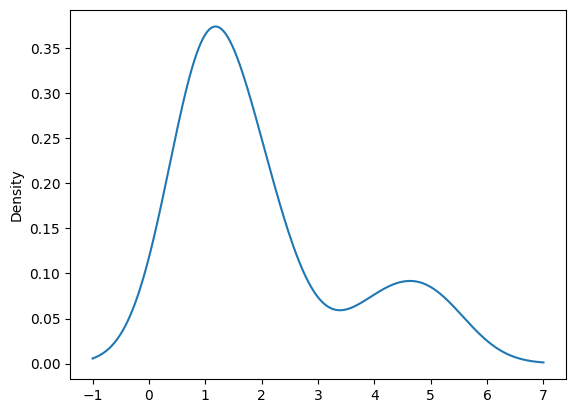

In [ ]:
df['WeightKg'].value_counts() \
.head(67) \
.plot(kind='kde')

<Axes: ylabel='Density'>

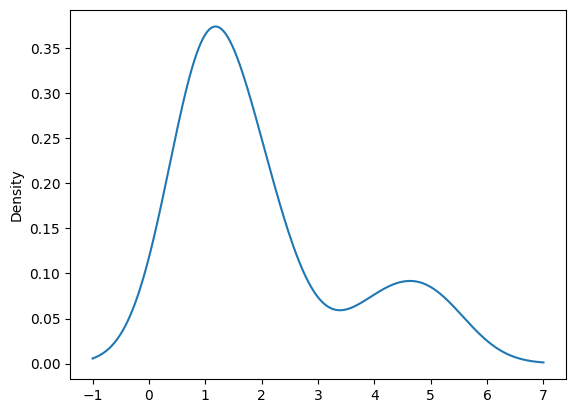

In [ ]:
df['WeightPounds'].value_counts() \
.head(67) \
.plot(kind='kde')

<Axes: ylabel='Frequency'>

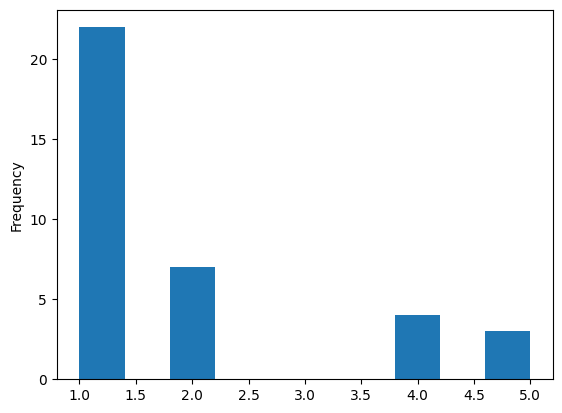

In [ ]:
df['BMI'].value_counts() \
.head(67) \
.plot(kind='hist')

In [ ]:
sns.pairplot(df,vars=['Id', 'Date', 'WeightKg', 'WeightPounds', 'BMI', 'IsManualReport',
       'LogId'])
plt.show()

NameError: name 'sns' is not defined

# 2D plot

In [ ]:
df.plot(kind='scatter',x='WeightKg',y='WeightPounds')

NameError: name 'df' is not defined

<Axes: xlabel='WeightKg', ylabel='BMI'>

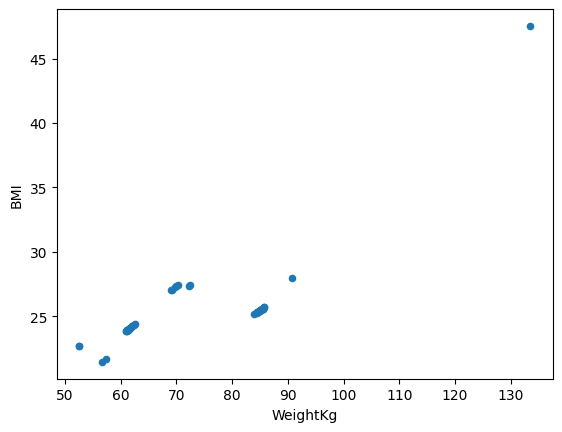

In [ ]:
df.plot(kind='scatter',x='WeightKg',y='BMI')

<Axes: xlabel='WeightPounds', ylabel='BMI'>

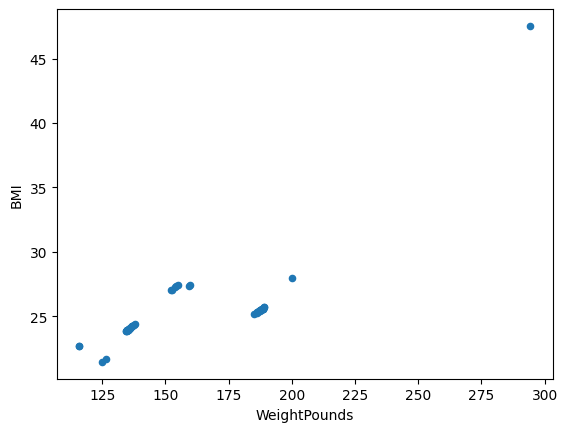

In [ ]:
df.plot(kind='scatter',x='WeightPounds',y='BMI')